In [1]:
# Getting parent directory of current direc and adding into the system path
import os, sys
parent_dir = os.path.dirname(os.getcwd())
sys.path.insert(0, parent_dir)


In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("/home/am/Documents/Software Development/10_Academy Training/week2/Data/Copy of Week2_challenge_data_source(CSV).csv")

In [4]:
df.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


In [5]:
# Import user enagement module and load data from the postgresql database
from scripts.user_engagement_analysis import UserEngagementAnalysis
user_engagement = UserEngagementAnalysis()


In [6]:
aggregated_data, top10_custs = user_engagement.aggregate_metrics(df)

In [7]:
print(top10_custs["session_frequency"])
print("\n\n============================================================================")
print(top10_custs['session_duration'])
print("\n\n============================================================================")
print(top10_custs["session_traffic"])

       MSISDN/Number  session_frequency  session_duration  session_traffic
13526   3.362632e+10              324.0         8791927.0     7.971167e+09
6437    3.361489e+10              289.0         9966898.0     8.846226e+09
13180   3.362578e+10              289.0        18553754.0     8.499621e+09
37052   3.365973e+10              256.0         4035428.0     7.705863e+09
76363   3.367588e+10              225.0         4865947.0     7.891111e+09
92923   3.376054e+10              225.0         9279434.0     8.514774e+09
65118   3.366716e+10              169.0         8744914.0     5.618394e+09
666     3.360313e+10              144.0         6287761.0     4.976195e+09
1279    3.360452e+10              144.0         5207990.0     5.487855e+09
13994   3.362708e+10              144.0         4703516.0     5.754731e+09


       MSISDN/Number  session_frequency  session_duration  session_traffic
13180   3.362578e+10              289.0        18553754.0     8.499621e+09
6437    3.361489e+10   

In [8]:
agg_data, kmeans = user_engagement.normalize_and_cluster(aggregated_data, k=3)

In [9]:
agg_data.columns

Index(['MSISDN/Number', 'session_frequency', 'session_duration',
       'session_traffic', 'cluster'],
      dtype='object')

In [10]:
aggregated_data.columns

Index(['MSISDN/Number', 'session_frequency', 'session_duration',
       'session_traffic', 'cluster'],
      dtype='object')

In [11]:
df.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


In [12]:
stats = user_engagement.compute_cluster_statistics(aggregated_data)

In [13]:
stats

session_frequency                             session_duration  \
                      min    max       mean       sum              min   
cluster                                                                  
0                     0.0   25.0   2.333489  110164.0           7146.0   
1                     0.0   16.0   1.179788   60240.0           7142.0   
2                     2.0  324.0  12.359655  106120.0          23292.0   

                                                 session_traffic  \
                max           mean           sum             min   
cluster                                                            
0         3174824.0  140867.038721  6.650333e+09    5.849202e+08   
1         1576929.0  108487.442812  5.539369e+09    3.324901e+07   
2        18553754.0  399386.900536  3.429136e+09    1.244485e+09   

                                                   
                  max          mean           sum  
cluster                                            
0        1.427100e+09  8.483228e+08  4.004932e+13  
1        5.986492e+08  3.420319e+08  1.746415e+13  
2        8.846226e+09  1.900766e+09  1.631998e+13

In [14]:
app_traffic, top_users_per_app = user_engagement.aggregate_traffic_per_app(df)

In [15]:
app_traffic.columns

Index(['MSISDN/Number', 'session_traffic', 'application'], dtype='object')

In [16]:
app_traffic[app_traffic['application']=="Social Media"].info()

<class 'pandas.core.frame.DataFrame'>
Index: 106856 entries, 0 to 106855
Data columns (total 3 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   MSISDN/Number    106856 non-null  float64
 1   session_traffic  106856 non-null  float64
 2   application      106856 non-null  object 
dtypes: float64(2), object(1)
memory usage: 3.3+ MB


In [17]:
app_traffic['application'].unique()

array(['Social Media', 'Google', 'Email', 'YouTube', 'Netflix', 'Gaming',
       'Other'], dtype=object)

In [18]:
top_users_per_app.columns

Index(['MSISDN/Number', 'session_traffic', 'application'], dtype='object')

In [19]:
top_users_per_app[top_users_per_app['application']=='Gaming']

,MSISDN/Number,session_traffic,application
540717,3.361489e+10,7.749432e+09,Gaming
627203,3.376054e+10,7.461045e+09,Gaming
547460,3.362578e+10,7.326673e+09,Gaming
610643,3.367588e+10,6.970568e+09,Gaming
547806,3.362632e+10,6.887572e+09,Gaming
571332,3.365973e+10,6.725559e+09,Gaming
597308,3.366646e+10,6.646303e+09,Gaming
626857,3.376041e+10,6.268620e+09,Gaming
591521,3.366471e+10,6.103856e+09,Gaming
620735,3.369879e+10,5.753743e+09,Gaming


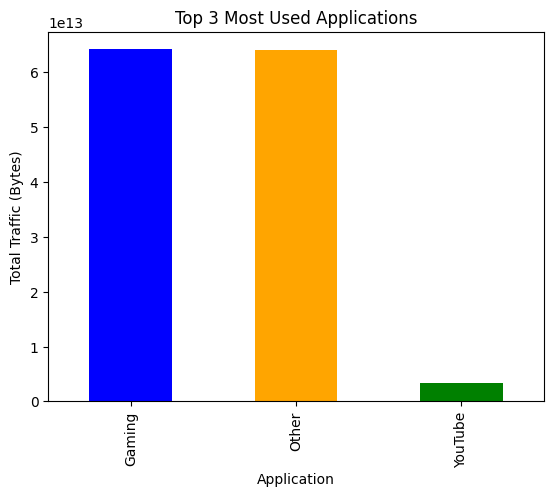

In [20]:
user_engagement.plot_top_apps(app_traffic)